In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# 1. 데이터셋 생성
n_samples = 200
np.random.seed(0)

# 클래스 0 데이터
feature1_class0 = np.random.normal(0, 1, n_samples//2)
feature2_class0 = np.random.normal(0, 1, n_samples//2)
feature3_class0 = np.random.normal(0, 5, n_samples//2)  # 노이즈

# 클래스 1 데이터
feature1_class1 = np.random.normal(5, 1, n_samples//2)
feature2_class1 = np.random.normal(0, 2, n_samples//2)
feature3_class1 = np.random.normal(0, 5, n_samples//2)  # 노이즈

# 데이터프레임 생성
df_class0 = pd.DataFrame({
    'feature1': feature1_class0,
    'feature2': feature2_class0,
    'feature3': feature3_class0,
    'label': 0
})

df_class1 = pd.DataFrame({
    'feature1': feature1_class1,
    'feature2': feature2_class1,
    'feature3': feature3_class1,
    'label': 1
})

df = pd.concat([df_class0, df_class1], ignore_index=True)

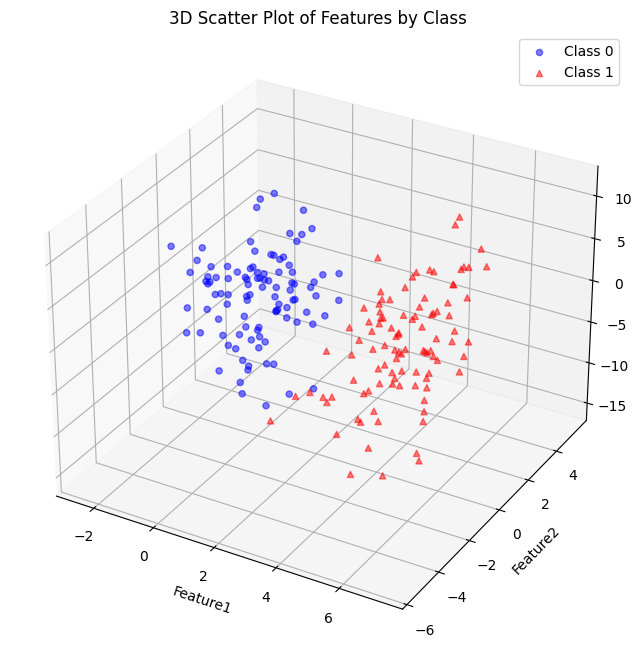

In [3]:
# 2. 데이터 시각화

# 3D 그래프를 생성하기 위한 Figure와 Axes 설정
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클래스별 데이터 분리
class0 = df[df['label'] == 0]
class1 = df[df['label'] == 1]

# 클래스 0 데이터 플로팅
ax.scatter(class0['feature1'], class0['feature2'], class0['feature3'],
           c='blue', label='Class 0', marker='o', alpha=0.5)

# 클래스 1 데이터 플로팅
ax.scatter(class1['feature1'], class1['feature2'], class1['feature3'],
           c='red', label='Class 1', marker='^', alpha=0.5)

# 축 레이블 설정
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')

# 범례 추가
ax.legend()

# 그래프 제목
ax.set_title('3D Scatter Plot of Features by Class')

# 그래프 표시
plt.show()

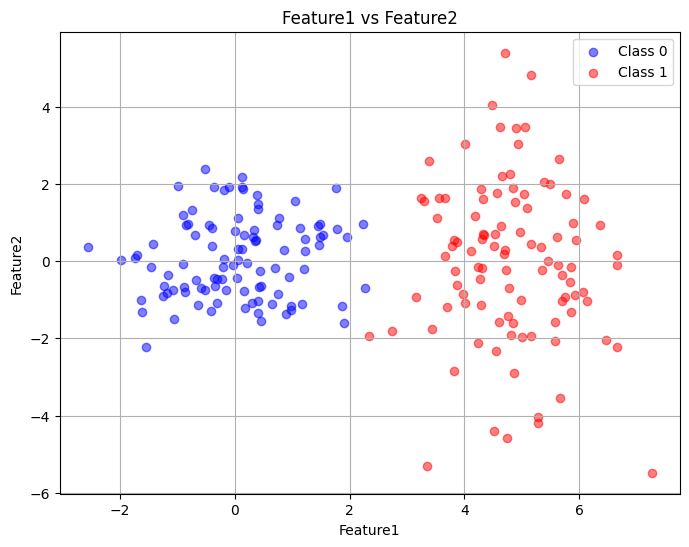

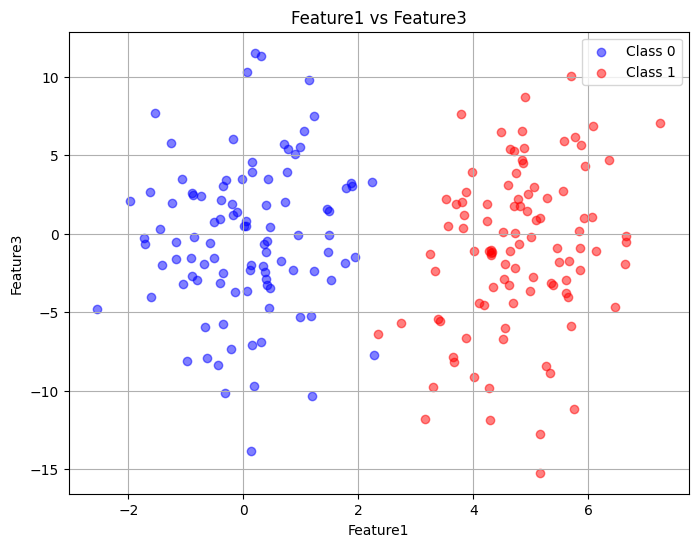

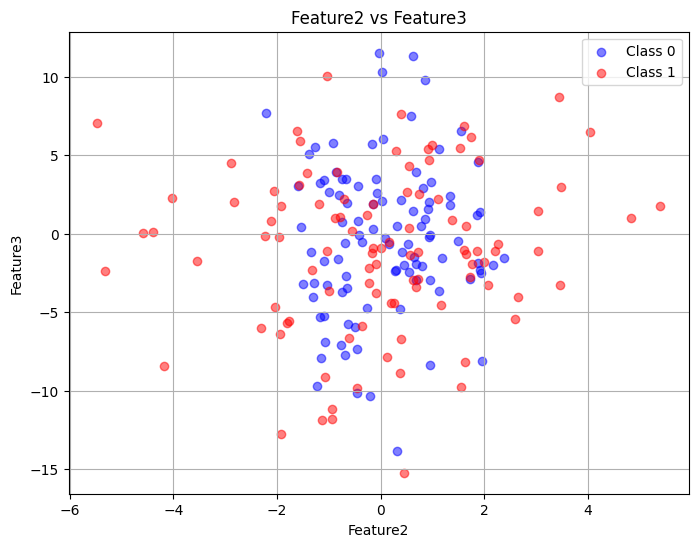

In [4]:
# Feature1 vs Feature2
plt.figure(figsize=(8,6))
plt.scatter(class0['feature1'], class0['feature2'], color='blue', label='Class 0', alpha=0.5)
plt.scatter(class1['feature1'], class1['feature2'], color='red', label='Class 1', alpha=0.5)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Feature1 vs Feature2')
plt.legend()
plt.grid(True)
plt.show()

# Feature1 vs Feature3
plt.figure(figsize=(8,6))
plt.scatter(class0['feature1'], class0['feature3'], color='blue', label='Class 0', alpha=0.5)
plt.scatter(class1['feature1'], class1['feature3'], color='red', label='Class 1', alpha=0.5)
plt.xlabel('Feature1')
plt.ylabel('Feature3')
plt.title('Feature1 vs Feature3')
plt.legend()
plt.grid(True)
plt.show()

# Feature2 vs Feature3
plt.figure(figsize=(8,6))
plt.scatter(class0['feature2'], class0['feature3'], color='blue', label='Class 0', alpha=0.5)
plt.scatter(class1['feature2'], class1['feature3'], color='red', label='Class 1', alpha=0.5)
plt.xlabel('Feature2')
plt.ylabel('Feature3')
plt.title('Feature2 vs Feature3')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-5-9b24e70a32aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='feature1', y='label', data=df, orient='h', jitter=True, palette=['blue', 'red'])


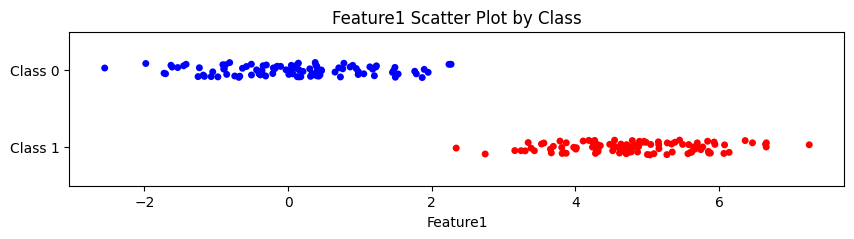

<ipython-input-5-9b24e70a32aa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='feature2', y='label', data=df, orient='h', jitter=True, palette=['blue', 'red'])


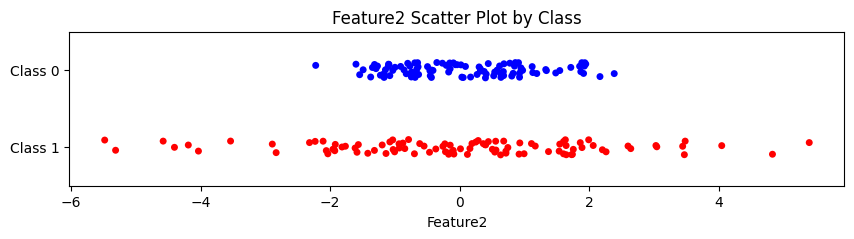

<ipython-input-5-9b24e70a32aa>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='feature3', y='label', data=df, orient='h', jitter=True, palette=['blue', 'red'])


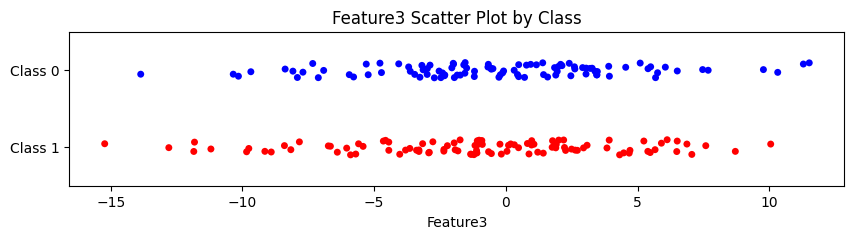

In [5]:
# Feature1 1차원 산점도
plt.figure(figsize=(10, 2))
sns.stripplot(x='feature1', y='label', data=df, orient='h', jitter=True, palette=['blue', 'red'])
plt.title('Feature1 Scatter Plot by Class')
plt.xlabel('Feature1')
plt.ylabel('')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Feature2 1차원 산점도
plt.figure(figsize=(10, 2))
sns.stripplot(x='feature2', y='label', data=df, orient='h', jitter=True, palette=['blue', 'red'])
plt.title('Feature2 Scatter Plot by Class')
plt.xlabel('Feature2')
plt.ylabel('')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Feature3 1차원 산점도
plt.figure(figsize=(10, 2))
sns.stripplot(x='feature3', y='label', data=df, orient='h', jitter=True, palette=['blue', 'red'])
plt.title('Feature3 Scatter Plot by Class')
plt.xlabel('Feature3')
plt.ylabel('')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

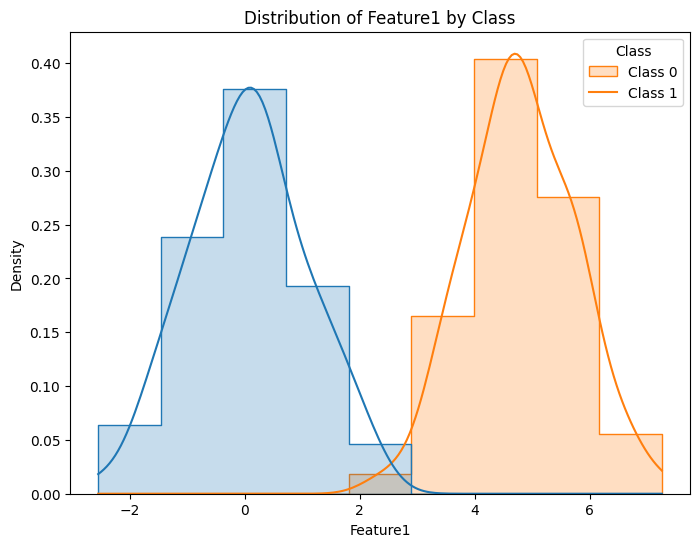

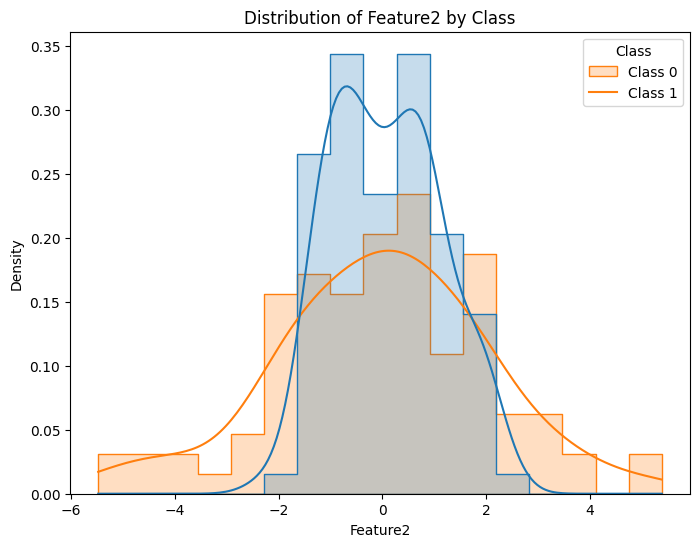

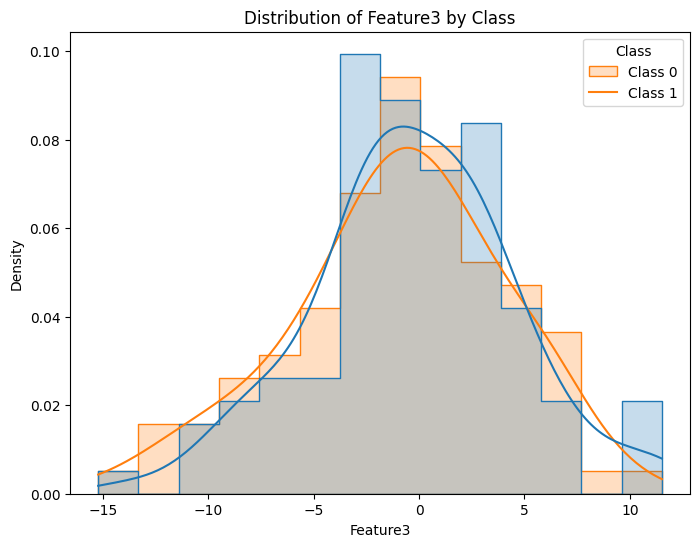

In [6]:
# Feature1 분포 시각화
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='feature1', hue='label', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution of Feature1 by Class')
plt.xlabel('Feature1')
plt.ylabel('Density')
plt.legend(title='Class', labels=['Class 0', 'Class 1'])
plt.show()

# Feature2 분포 시각화
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='feature2', hue='label', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution of Feature2 by Class')
plt.xlabel('Feature2')
plt.ylabel('Density')
plt.legend(title='Class', labels=['Class 0', 'Class 1'])
plt.show()

# Feature3 분포 시각화
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='feature3', hue='label', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution of Feature3 by Class')
plt.xlabel('Feature3')
plt.ylabel('Density')
plt.legend(title='Class', labels=['Class 0', 'Class 1'])
plt.show()# 클래스별 데이터 분리
class0 = df[df['label'] == 0]
class1 = df[df['label'] == 1]

In [7]:
# 3. Fisher's Ratio 계산
def fisher_ratio(feature, label):
    classes = np.unique(label)
    if len(classes) != 2:
        raise ValueError("두 개의 클래스를 가진 데이터만 지원합니다.")

    mu1 = feature[label == classes[0]].mean()
    mu2 = feature[label == classes[1]].mean()
    sigma1_sq = feature[label == classes[0]].var()
    sigma2_sq = feature[label == classes[1]].var()

    numerator = (mu1 - mu2) ** 2
    denominator = sigma1_sq + sigma2_sq
    if denominator == 0:
        return 0
    return numerator / denominator

features = ['feature1', 'feature2', 'feature3']
fisher_scores = {}

for feature in features:
    score = fisher_ratio(df[feature], df['label'])
    fisher_scores[feature] = score
    print(f"{feature}의 Fisher's Ratio: {score:.2f}")

feature1의 Fisher's Ratio: 11.85
feature2의 Fisher's Ratio: 0.00
feature3의 Fisher's Ratio: 0.01


In [8]:
# 4. Feature Selection 및 모델 학습
sorted_features = sorted(fisher_scores.items(), key=lambda item: item[1], reverse=True)
print("\nFisher's Ratio에 따른 특징 중요도 순서:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.2f}")

selected_feature = sorted_features[0][0]
print(f"\n선택된 특징: {selected_feature}")

# 전체 특징 사용 시 모델 학습 및 평가
X_full = df[features]
y = df['label']
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

model_full = SVC()
model_full.fit(X_train_full, y_train)
y_pred_full = model_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"\n전체 특징 사용 시 정확도: {accuracy_full:.2f}")

# 선택된 특징만 사용 시 모델 학습 및 평가
X_selected = df[[selected_feature]]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.3, random_state=42)

model_sel = SVC()
model_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = model_sel.predict(X_test_sel)
accuracy_sel = accuracy_score(y_test_sel, y_pred_sel)
print(f"선택된 특징 사용 시 정확도: {accuracy_sel:.2f}")


Fisher's Ratio에 따른 특징 중요도 순서:
feature1: 11.85
feature3: 0.01
feature2: 0.00

선택된 특징: feature1

전체 특징 사용 시 정확도: 0.98
선택된 특징 사용 시 정확도: 1.00
